# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X= fetch_openml('mnist_784')['data']
y= fetch_openml('mnist_784')['target']

### Now take a look at the shapes of the X and y matricies 

In [2]:
print(X.shape, y.shape)

(70000, 784) (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [3]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

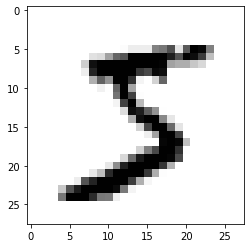

In [4]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.imshow(X[0,:].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [5]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [6]:
X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000] 
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [7]:
y_train = np.where(y_train == '5', 1, 0)
y_test = np.where(y_test == '5', 1, 0)

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [8]:
from sklearn.linear_model import LogisticRegression

model_five = LogisticRegression().fit(X_train, y_train)

/usr/local/Cellar/jupyterlab/2.1.0/libexec/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Does the classifier predict correctly the 36000th digit we picked before?

In [9]:
y_pred_train = model_five.predict(X_train)

print("Prediction correct:", y_pred_train[36000] == y_train[36000])

Prediction correct: True


### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [10]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [11]:
never_5_clf.fit(X_train, y_train)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_pred_test = model_five.predict(X_test)

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1:', f1_score(y_test, y_pred_test))


y_pred_test_never5 = never_5_clf.predict(X_test)

print("Confusion matrix never5: \n", confusion_matrix(y_test, y_pred_test_never5))
print('Precision:', precision_score(y_test, y_pred_test_never5))
print('Recall:', recall_score(y_test, y_pred_test_never5))
print('F1:', f1_score(y_test, y_pred_test_never5))

Confusion matrix: 
 [[9034   74]
 [ 147  745]]
Precision: 0.9096459096459096
Recall: 0.8352017937219731
F1: 0.8708357685563999
Confusion matrix never5: 
 [[9108    0]
 [ 892    0]]
Precision: 0.0
Recall: 0.0
F1: 0.0


/usr/local/Cellar/jupyterlab/2.1.0/libexec/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

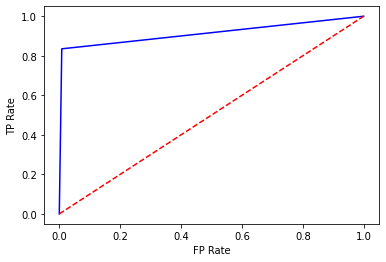

In [13]:
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve (y_test, y_pred_test)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

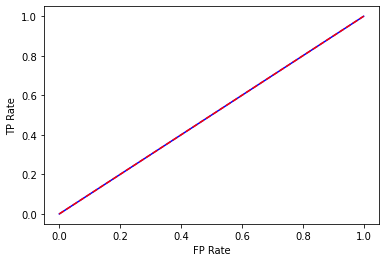

In [14]:
fpr, tpr, threshold = roc_curve (y_test, y_pred_test_never5)
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

### Now find the roc_auc_score for each. 

In [15]:
from sklearn.metrics import accuracy_score

print("Accuracy score:", accuracy_score(y_test, y_pred_test))
print("Accuracy score never 5:", accuracy_score(y_test, y_pred_test_never5))

Accuracy score: 0.9779
Accuracy score never 5: 0.9108


### What does this metric tell you? Which classifier works better with this metric in mind?

In [16]:
print('Accuracy is higher for Logistical Regression')

Accuracy is higher for Logistical Regression
